### Load the database

In [1]:
import pandas as pd
print(pd.__version__)

1.2.4


In [5]:
from sociophysicsDataHandler import SociophysicsDataHandler
import pandas as pd
import matplotlib.pyplot as pl

student_config = True

file_target = 'asdz/platform2.2/20200428/ASDZ_Perron2.2_2020042815_trajectorie.parquet' 

if student_config:
    dh = SociophysicsDataHandler()
    dh.fetch_prorail_data_from_path(file_target)
else:
    webdav_basepath='/Crowdflow (Projectfolder)/ProRail_USE_LL_data'
    dh = SociophysicsDataHandler(basepath=webdav_basepath)
    
    dh.fetch_prorail_data_from_path(file_target)
                           # ,basepath=webdav_basepath)

print('The available files are the following:')
dh.list_files("econophysics/reddit/")
for path in dh.filelist['path']:
    print(path)

trying to fetch: /storage/surfsara/ProRail_USE_LL_data/asdz/platform2.2/20200428/ASDZ_Perron2.2_2020042815_trajectorie.parquet
data fetched. Accessible as <this-object>.df
The available files are the following:
targeting path /storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/
Files listed. Accessible as <this-object>.filelist
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_AAPL.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_AMC.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_BBBY.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_FIZZ.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_GME.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_LGND.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_NOKIA.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_VIAC.tar.gz
/storage/surfsara/ProRail_USE_LL_

In [24]:
targetPosts = True
stock = 'AAPL'
stocks_w_interest = {"AAPL", "FIZZ", "LGND", "GME", "AMC"}

def get_reddit_df(dh, stock, targetPosts):
    if targetPosts:
        filename = 'submissions_wallstreetbets_' + stock + '_start20200901_end20210706.json'
        if stock == 'GME':
            filename = 'submissions_wallstreetbets_GME_start20200901_end20210624.json'
    else:
        filename = 'comments_' + stock + '.tar.gz'
        
    dh.fetch_econophysics_data_from_path("econophysics/reddit/" + filename)
    df = dh.df
    # print one of the entries (in this case, the fifth):
    return df

df = get_reddit_df(dh, stock, targetPosts)

for col in df.columns:
    print(col)
    
df

trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/reddit/submissions_wallstreetbets_AAPL_start20200901_end20210706.json
data fetched. Accessible as <this-object>.df
all_awardings
author
author_fullname
created_utc
full_link
gildings
id
link_flair_css_class
link_flair_text
num_comments
num_crossposts
over_18
permalink
pinned
removed_by_category
retrieved_on
score
selftext
subreddit
subreddit_id
subreddit_subscribers
title
total_awards_received
upvote_ratio
url
created


,all_awardings,author,author_fullname,created_utc,full_link,gildings,id,link_flair_css_class,link_flair_text,num_comments,...,score,selftext,subreddit,subreddit_id,subreddit_subscribers,title,total_awards_received,upvote_ratio,url,created
oesnpu,[],No-Discipline-2830,t2_cwwx4amt,1625569270,https://www.reddit.com/r/wallstreetbets/commen...,{},oesnpu,yolo,YOLO,1,...,1,[removed],wallstreetbets,t5_2th52,10637507,$Aapl,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1625562070
oekrcs,[],ktrizzlewwp,t2_11ziw1,1625534454,https://www.reddit.com/r/wallstreetbets/commen...,{},oekrcs,profit,Gain,0,...,1,,wallstreetbets,t5_2th52,10636158,Been Holding AAPL for years. Time to take profit?,0,1.0,https://i.redd.it/5hv769pzuh971.jpg,1625527254
oeeiik,[],Fun_Preparation9044,t2_9yxc5748,1625513545,https://www.reddit.com/r/wallstreetbets/commen...,{},oeeiik,chart,Technical Analysis,0,...,1,"Earlier, I wasn’t able to navigate creating a ...",wallstreetbets,t5_2th52,10635018,FB &amp; WISH Drops After Their IPOs 8 1/2 yea...,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1625506345
odzgvm,[],Midiex,t2_6vsjc,1625458208,https://www.reddit.com/r/wallstreetbets/commen...,{},odzgvm,profit,Gain,0,...,1,,wallstreetbets,t5_2th52,10631970,"Up 2,100% from $159 on 6/2. Mostly just buying...",0,1.0,https://reddit.com/r/wallstreetbets/comments/o...,1625451008
odz9lr,[],Midiex,t2_6vsjc,1625457380,https://www.reddit.com/r/wallstreetbets/commen...,{},odz9lr,profit,Gain,0,...,1,,wallstreetbets,t5_2th52,10631944,"Started with $159. Had a 2,100% return last mo...",0,1.0,https://i.imgur.com/ohYRRFp.jpg,1625450180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ik98ij,[],DonRich_19,t2_7d72x744,1598916802,https://www.reddit.com/r/wallstreetbets/commen...,{},ik98ij,shitpost,Shitpost,5,...,1,I bought some call ITM options for AAPL 70c 9/...,wallstreetbets,t5_2th52,1450715,Is anyone else’s diamond hands JPOW going tits...,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598909602
ik97ic,[],TheDudeHuman,t2_78diz2gg,1598916706,https://www.reddit.com/r/wallstreetbets/commen...,{},ik97ic,shitpost,Shitpost,2,...,1,[removed],wallstreetbets,t5_2th52,1450713,I don't think that it is a good idea to do any...,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598909506
ik96fh,[],AstroG8R,t2_k14rb9c,1598916599,https://www.reddit.com/r/wallstreetbets/commen...,{},ik96fh,yolo,YOLO,20,...,1,I just lucked out with a windfall of $20k from...,wallstreetbets,t5_2th52,1450712,"Windfall of $20k, What would you do?",0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598909399
ik92qj,[],sandawg_,t2_1n2x5nxm,1598916242,https://www.reddit.com/r/wallstreetbets/commen...,{},ik92qj,meme,Meme,0,...,1,,wallstreetbets,t5_2th52,1450700,From instagram’s largest meme page. The top is...,0,1.0,https://i.redd.it/r87opord9fk51.jpg,1598909042


### Create time sorted reddit post df

In [7]:
def sort_reddit_data(df):
    df = df.sort_values(by="created_utc")
    df['created_utc'] = pd.to_datetime(df['created_utc'], origin='unix', unit='s')

    return df

def rolling_window_reddit(df, window_var):
    redditRollingAmount = df[['id']].rolling(window = window_var).count()
    redditRollingAmount = redditRollingAmount.rename(columns={'id':'rolling_count'})

    return redditRollingAmount

def import_reddit_data(dh, stock):
    df = get_reddit_df(dh, stock, True)
    df = sort_reddit_data(df)
    return df

### Stock preparation

In [8]:
def import_hourly_prices(dh, stock):
    dh.fetch_econophysics_data_from_path("econophysics/prices/hourly_prices.csv")
    prices_hour = dh.df
    prices_hour.index = pd.to_datetime(prices_hour.index) # to be sure that the index is in the pandas DateTime format

    # the times you see in the index of prices_hour are expressed in New York time (American Eastern Time) 
    # American Eastern Time is defined as UTC-5 in autumn and winter, and UTC-4 in spring and summer (daylight saving)
    import datetime as dt
    from dateutil import tz # library to treat timezones
    NYC = tz.gettz('America/New_York') # define the New York timezone

    new_index_list = []
    for i in range(len(prices_hour)):
        # for each index, make the previous index transformation:
        old_index = prices_hour.index[i]
        dat = str(old_index.date())
        dt1 = dt.datetime(int(dat[0:4]), int(dat[5:7]),int(dat[8:10]), tzinfo=NYC)
        UTC_lag = dt1.utcoffset() / dt.timedelta(hours=1)
        new_index = prices_hour.index[i] - pd.Timedelta(hours=UTC_lag)
        # attach the UTC index to the new index list:
        new_index_list.append(new_index)
        
    # set the new UTC index to the prices_hour dataframe:
    prices_hour.index = new_index_list

    return prices_hour[[stock]] #corrected reddit time prices

In [9]:
import_hourly_prices(dh, stock)

trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/prices/hourly_prices.csv
data fetched. Accessible as <this-object>.df


,AAPL
2020-09-01 00:00:00,128.705970
2020-09-01 08:00:00,NaN
2020-09-01 09:00:00,131.482293
2020-09-01 10:00:00,131.750970
2020-09-01 11:00:00,131.741019
...,...
2021-07-14 19:00:00,149.320000
2021-07-14 20:00:00,149.210000
2021-07-14 21:00:00,149.290000
2021-07-14 22:00:00,149.430000


In [10]:
before_peak_start = '2021-01-01'
before_peak_end = '2021-01-22'
after_peak_start = '2021-01-23'
after_peak_end = '2021-01-30'

## VADER, textblob sentiment. VADER below.

In [11]:
# redditpostsRelevant = redditPosts.query('link_flair_text == "Discussion" or link_flair_text == "News" or link_flair_text == "Loss" or link_flair_text == "Gain"')

# redditpostsRelevant['text_sentiment_score'] = redditpostsRelevant['title'].apply(sentiment_scores)
# #takes extremely long, might want to include some kind of progress printing and do it on a pc.
# redditpostsRelevant

# #also for now there is only title implementation as selftext might be missing (in the case of memes for example)
# #but that might actuall©y be an advantage, filtering out memes and removed posts in order to make scoring even more accurate.

# Getting short interest data

In [12]:
csv_location = 'short_interestFIZZ&LGND&AAPL&GME&AMC.csv'

def short_interest_import(csv_location, stock):
    short_interest = pd.read_csv(csv_location)
    short_interest = short_interest.drop(columns=['Unnamed: 0', 'Unnamed: 4'])
    short_interest['Instrument'] = short_interest['Instrument'].apply(lambda x: x.split('.')[0])

    unique_vals = short_interest['Instrument'].unique()


    for unique_instr in unique_vals:
        print("\n" + unique_instr)
        print(short_interest.groupby(short_interest.Instrument).get_group(unique_instr))
        
    GME_shorts = short_interest.groupby(short_interest.Instrument).get_group(stock)

    GME_shorts["Date"] = pd.to_datetime(GME_shorts['Date'], format='%Y-%m-%dT%H:%M:%SZ')
    GME_shorts = GME_shorts.drop(columns=['Instrument'])
    GME_shorts = GME_shorts.rename({'Date': 'ds'}, axis='columns')
    return GME_shorts

In [13]:
short_interest_df = short_interest_import(csv_location, stock)

short_interest_df


AAPL
    Instrument                  Date  Short Interest Pct
0         AAPL  2020-01-03T00:00:00Z            1.038199
1         AAPL  2020-01-10T00:00:00Z            1.038199
2         AAPL  2020-01-17T00:00:00Z            0.948841
3         AAPL  2020-01-24T00:00:00Z            0.948841
4         AAPL  2020-01-31T00:00:00Z            0.949465
..         ...                   ...                 ...
199       AAPL  2023-10-27T00:00:00Z            0.595016
200       AAPL  2023-11-03T00:00:00Z            0.631451
201       AAPL  2023-11-10T00:00:00Z            0.631341
202       AAPL  2023-11-17T00:00:00Z            0.631341
203       AAPL  2023-11-24T00:00:00Z            0.631341

[204 rows x 3 columns]

FIZZ
    Instrument                  Date  Short Interest Pct
204       FIZZ  2020-01-03T00:00:00Z           17.029749
205       FIZZ  2020-01-10T00:00:00Z           17.029749
206       FIZZ  2020-01-17T00:00:00Z           16.406647
207       FIZZ  2020-01-24T00:00:00Z           16.40

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18308\2816986129.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GME_shorts["Date"] = pd.to_datetime(GME_shorts['Date'], format='%Y-%m-%dT%H:%M:%SZ')


,ds,Short Interest Pct
0,2020-01-03,1.038199
1,2020-01-10,1.038199
2,2020-01-17,0.948841
3,2020-01-24,0.948841
4,2020-01-31,0.949465
...,...,...
199,2023-10-27,0.595016
200,2023-11-03,0.631451
201,2023-11-10,0.631341
202,2023-11-17,0.631341


## Prophet prep (move down)

In [22]:
def merge_short_and_price(prices, stock, shorts=None):
    prices.reset_index(level=0, inplace=True)
    prices = prices.rename({'index': 'ds', stock: 'y'}, axis='columns')
    prices = prices.dropna()

    if stock in stocks_w_interest:
        merge_short_n_price = pd.merge_asof(prices, shorts, on='ds', direction='backward')
        #use backward direction to prevent bias.
        return merge_short_n_price
    return prices

prices_stock = import_hourly_prices(dh, stock)
prices_stock
merged_stocks_and_prices = merge_short_and_price(prices_stock, stock, short_interest_df)
merged_stocks_and_prices

trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/prices/hourly_prices.csv
data fetched. Accessible as <this-object>.df


,ds,y,Short Interest Pct
0,2020-09-01 00:00:00,128.705970,0.553339
1,2020-09-01 09:00:00,131.482293,0.553339
2,2020-09-01 10:00:00,131.750970,0.553339
3,2020-09-01 11:00:00,131.741019,0.553339
4,2020-09-01 12:00:00,131.352931,0.553339
...,...,...,...
3477,2021-07-14 19:00:00,149.320000,0.540601
3478,2021-07-14 20:00:00,149.210000,0.540601
3479,2021-07-14 21:00:00,149.290000,0.540601
3480,2021-07-14 22:00:00,149.430000,0.540601


## import sentiment

In [15]:
#This typo has been here for way too long

sentiment_GME_path = 'redditpostsRevelant.csv'
sentiment_path = 'sentimentdataa.xlsx'

     
def filter_reddit_for_sentiment(redditPosts):
    return redditPosts.query('link_flair_text == "Discussion" or link_flair_text == "News" or link_flair_text == "Loss" or link_flair_text == "Gain"')


def import_Rohan_data(xlsx_file_path):

    xls = pd.ExcelFile(xlsx_file_path)

    dfs_dict = {}

    for sheet_name in xls.sheet_names:
        
        local_df = pd.read_excel(xls, sheet_name)
        dfs_dict[sheet_name.split('_')[0]] = local_df
    
    return dfs_dict[stock]

def import_sentiment(stock):
    if stock == "GME":
        sentiment_values = pd.read_csv(sentiment_GME_path)
        sentiment_values.rename(columns={'text_sentiment_score': 'sentiment'}, inplace=True)
        sentiment_values = filter_reddit_for_sentiment(sentiment_values)
        sentiment_values['created_utc'] = pd.to_datetime(sentiment_values['created_utc'])
    else:
        sentiment_values = import_Rohan_data(sentiment_path)
        sentiment_values.rename(columns={'Unnamed: 0': 'id', 'title': 'sentiment'}, inplace=True)
        sentiment_values.sort_values(by='id', inplace=True)
        
    return sentiment_values

In [16]:
# sentiment_values = sentiment_values.rename({'created_utc':'ds'}, axis='columns')

# sentiment_values = sentiment_values.set_index('ds')
# sentiment_values.sort_index(inplace=True)

# sentiment_values
#aggregate troll

In [17]:
def merge_sentiment_and_filter(redditposts, sentiments, stock):
    if stock == "GME":
        return sentiments
    else:
        merged_reddit_posts = pd.merge(redditposts, sentiments, on='id', how='outer')
        merged_reddit_posts = filter_reddit_for_sentiment(merged_reddit_posts)
        return merged_reddit_posts

redditPosts = import_reddit_data(dh, stock)
redditPosts
sentiment_df = import_sentiment(stock)
merged_reddit_posts = merge_sentiment_and_filter(redditPosts, sentiment_df, stock)

merged_reddit_posts

trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/reddit/submissions_wallstreetbets_AAPL_start20200901_end20210706.json
data fetched. Accessible as <this-object>.df


,all_awardings,author,author_fullname,created_utc,full_link,gildings,id,link_flair_css_class,link_flair_text,num_comments,...,selftext,subreddit,subreddit_id,subreddit_subscribers,title,total_awards_received,upvote_ratio,url,created,sentiment
0,[],Game_Ace,t2_4l5nby,2020-08-31 22:27:46,https://www.reddit.com/r/wallstreetbets/commen...,{},ik83up,question,Discussion,51,...,"am an immigrant in the US, software dev and re...",wallstreetbets,t5_2th52,1450583,if this is not a sign that market is overvalue...,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598905666,0.0000
8,[],f1fan,t2_3vmfp,2020-09-01 02:48:18,https://www.reddit.com/r/wallstreetbets/commen...,{},ikcaht,question,Discussion,1,...,,wallstreetbets,t5_2th52,1451098,Strange AAPL Contract Prices,0,1.0,https://i.imgur.com/KXT502b.jpg,1598921298,-0.2023
10,[],kwaddell1997,t2_5qpmm6u3,2020-09-01 06:06:35,https://www.reddit.com/r/wallstreetbets/commen...,{},ikezxz,question,Discussion,52,...,"Hi guys, please don't make fun of me as I'm st...",wallstreetbets,t5_2th52,1451478,New investor with 16 AAPL and 5 TSLA,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598933195,0.0000
21,[],Brilliant-Pumpkin-99,t2_61if5u7d,2020-09-01 14:20:44,https://www.reddit.com/r/wallstreetbets/commen...,{},ikl4f8,profit,Gain,2,...,,wallstreetbets,t5_2th52,1452124,I know it’s early but I just want to share my ...,0,1.0,https://i.redd.it/s8jpzu0dpjk51.jpg,1598962844,0.5023
23,[],str8c4shh0mee,t2_3eblbqz7,2020-09-01 14:29:58,https://www.reddit.com/r/wallstreetbets/commen...,{},ikla5f,question,Discussion,23,...,I want to record this now. I sold 20 aapl call...,wallstreetbets,t5_2th52,1452135,Robinhood class action,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598963398,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,[],Sufficient-Ad-3905,t2_a1v202av,2021-07-04 16:21:03,https://www.reddit.com/r/wallstreetbets/commen...,{},odnprn,question,Discussion,1,...,[removed],wallstreetbets,t5_2th52,10629767,Happy 4 AAPL?,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1625408463,0.5719
2020,[],HardtackOrange,t2_gy993,2021-07-04 23:14:22,https://www.reddit.com/r/wallstreetbets/commen...,{},odv8ni,question,Discussion,0,...,"*""The Elder Days are gone. The Middle Days are...",wallstreetbets,t5_2th52,10631111,🧙The Elders of WSB,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1625433262,0.0000
2021,[],Midiex,t2_6vsjc,2021-07-05 03:56:20,https://www.reddit.com/r/wallstreetbets/commen...,{},odz9lr,profit,Gain,0,...,,wallstreetbets,t5_2th52,10631944,"Started with $159. Had a 2,100% return last mo...",0,1.0,https://i.imgur.com/ohYRRFp.jpg,1625450180,-0.2960
2022,[],Midiex,t2_6vsjc,2021-07-05 04:10:08,https://www.reddit.com/r/wallstreetbets/commen...,{},odzgvm,profit,Gain,0,...,,wallstreetbets,t5_2th52,10631970,"Up 2,100% from $159 on 6/2. Mostly just buying...",0,1.0,https://reddit.com/r/wallstreetbets/comments/o...,1625451008,0.0000


In [26]:
def create_training_test_set(sentiment_df, price_and_short_df):
    sentiment_df = sentiment_df[['created_utc', 'sentiment']]
    sentiment_df = sentiment_df.rename({'created_utc':'ds'}, axis='columns')
    sentiment_df = sentiment_df.set_index('ds')
    sentiment_df.sort_index(inplace=True)
    
    #Nudges here
    
    sentiment_df = sentiment_df[['sentiment']].rolling(window = '1D').sum()
    
    merged_all = pd.merge_asof(price_and_short_df, sentiment_df, on='ds', direction='backward')
    return merged_all

In [36]:
from prophet import Prophet
prophet_model = Prophet(daily_seasonality=True)

In [37]:
merged_ALL = create_training_test_set(merged_reddit_posts, merged_stocks_and_prices)

train = merged_ALL.set_index('ds')
train = train['2020-09-01':'2021-01-10']
train = train.reset_index()
test = merged_ALL.set_index('ds')
test = test['2021-01-11':'2021-03-11']
test = test.reset_index()

In [38]:
train

,ds,y,Short Interest Pct,sentiment
0,2020-09-01 00:00:00,128.705970,0.553339,0.0000
1,2020-09-01 09:00:00,131.482293,0.553339,-0.2023
2,2020-09-01 10:00:00,131.750970,0.553339,-0.2023
3,2020-09-01 11:00:00,131.741019,0.553339,-0.2023
4,2020-09-01 12:00:00,131.352931,0.553339,-0.2023
...,...,...,...,...
1430,2021-01-08 22:00:00,131.569576,0.541464,-0.0140
1431,2021-01-08 23:00:00,131.689194,0.541464,-0.0140
1432,2021-01-09 00:00:00,131.529703,0.541464,-0.0140
1433,2021-01-09 01:00:00,131.489831,0.541464,-0.0140


In [39]:
if stock in stocks_w_interest:
    prophet_model.add_regressor('Short Interest Pct')
    
prophet_model.add_regressor('sentiment', prior_scale=10.0)

prophet_model.fit(train)

11:00:00 - cmdstanpy - INFO - Chain [1] start processing
11:00:02 - cmdstanpy - INFO - Chain [1] done processing


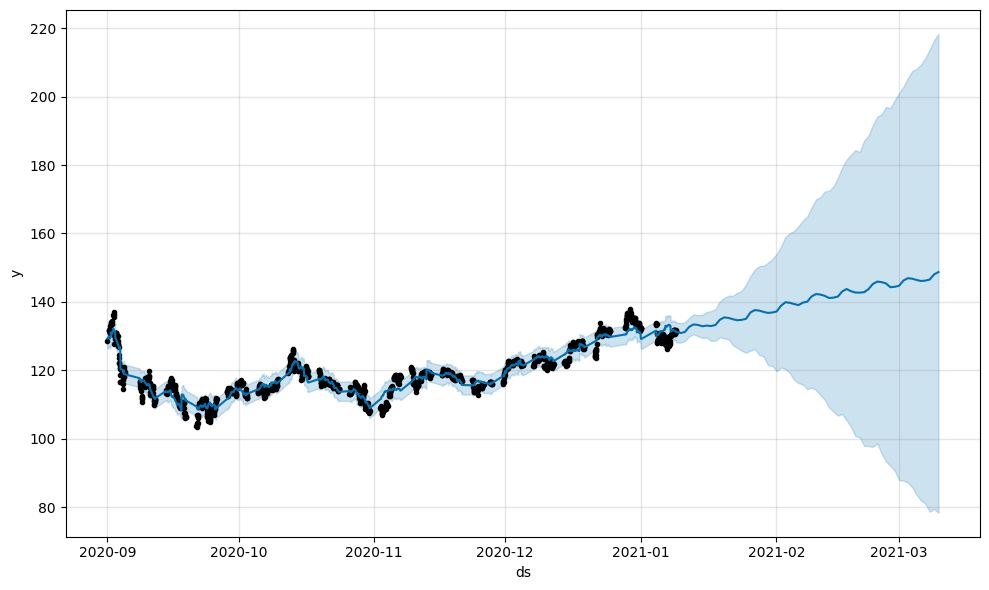

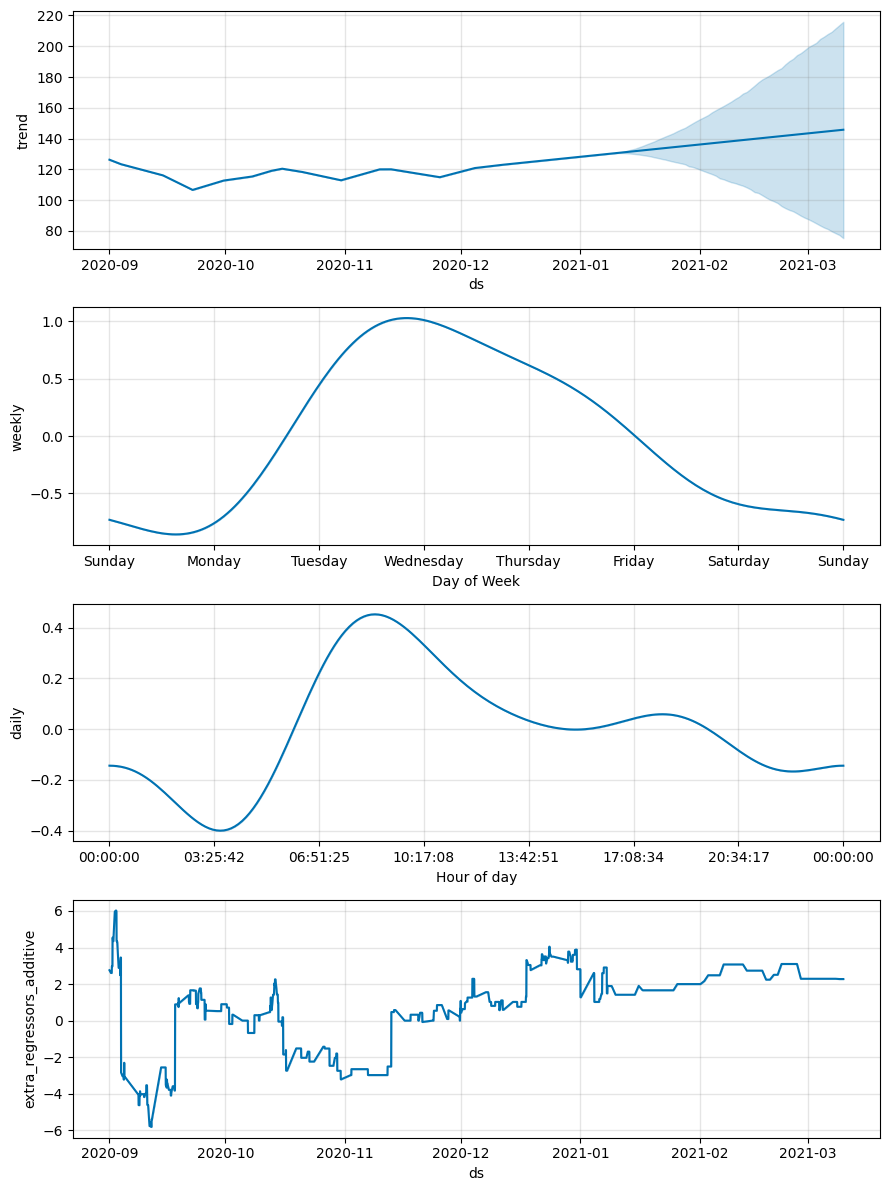

In [40]:
future = prophet_model.make_future_dataframe(periods=60)
future['Short Interest Pct'] = merged_ALL['Short Interest Pct']
future['sentiment'] = merged_ALL['sentiment']
forecast = prophet_model.predict(future)
figure1 = prophet_model.plot(forecast)
figure2 = prophet_model.plot_components(forecast)